# Tutorial: change the detector layout

The central position and orientation of a detector are easily modified. This notebook demonstrates how sources appear in different layouts of the detector.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from warpfield.telescope import display_sources, get_subplot
from warpfield.telescope.source import convert_skycoord_to_sourcetable
from warpfield.telescope.jasmine import get_jasmine

In [2]:
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u

An artificial source set is used in this notebook. Load the coordinate file and convert to the `SkyCoord` instance. The artificial sources are distributed around the Galactic center. The telescope is pointed toward the Galactic center too. The position angle of the telescope is set to 0.0 deg in the galactic coordinate.

In [3]:
coo = np.loadtxt('data/sample.coo')
src = SkyCoord(coo[:,0]*u.deg, coo[:,1]*u.deg, frame='galactic')
table = convert_skycoord_to_sourcetable(src)

In [4]:
pointing = SkyCoord(0.0*u.deg,0.0*u.deg, frame='galactic')
position_angle = Angle(0.0, unit='degree')
jasmine = get_jasmine(pointing, position_angle)

The figure below shows the on-sky distribution of the artifical sources.

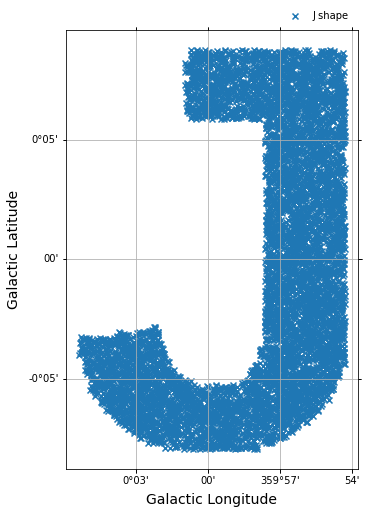

In [5]:
fig, ax = get_subplot(pointing, figsize=(8,8))
display_sources(ax, table, title='J shape')
fig.tight_layout()
plt.show()

Illustrate the detector's field-of-view and the artifical sources on the focal plane.

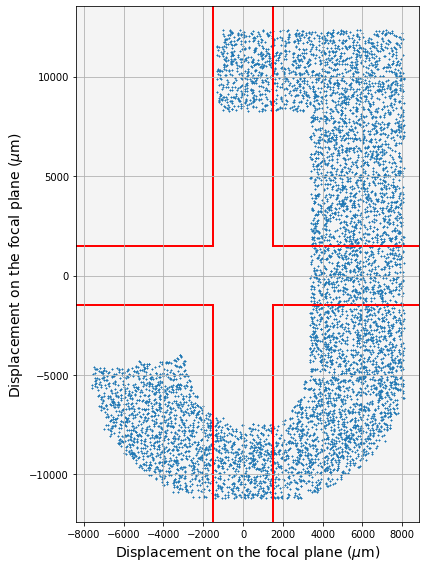

In [6]:
fig,ax = plt.subplots(figsize=(8,8))
jasmine.display_focal_plane(ax, src)
fig.tight_layout()
plt.show()

Use the `observe` function to convert the positions on the focal plane focal plane are converted into those on the detector.

In [7]:
pos = jasmine.observe(table)

Display the locations of the artificial sources on the detector. In this sample, the detector center is located at the origin of the focal plane and perfectly alined to the focal plane axis. Thus, the distribution of the sources are exactly the same as the previous one.

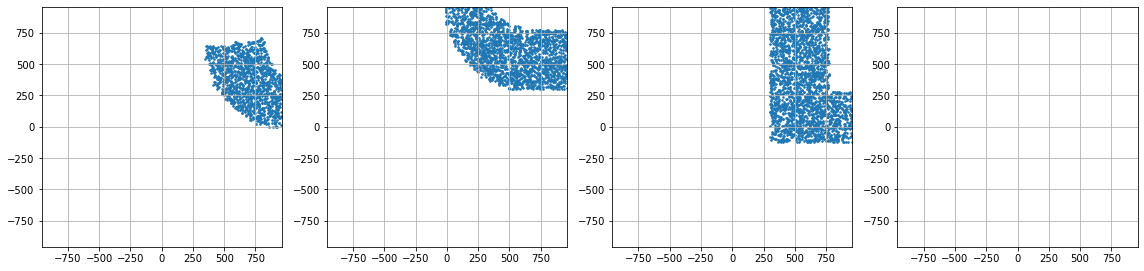

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))
for n, ax in enumerate(axes.flat):
    ax.set_aspect(1.0)
    ax.scatter(pos[n]['nx'], pos[n]['ny'], 10, marker='.')
    ax.set_xlim(jasmine.detectors[n].xrange)
    ax.set_ylim(jasmine.detectors[n].yrange)
    ax.grid()
fig.tight_layout()
plt.show()

Next case. The detector is installed with an unwanted rotation of 5.0 deg. To rotate the detector, modify the `position_angle` instance of the detector. Use the `display_focal_plane` function to confirm that the detector orientation is successfuly altered.

Note that the available region (gray) is not rotated likewise since the region is fixed to the telescope optics. The sections that spread out of the available region are dead zones; no source appears in the sections.

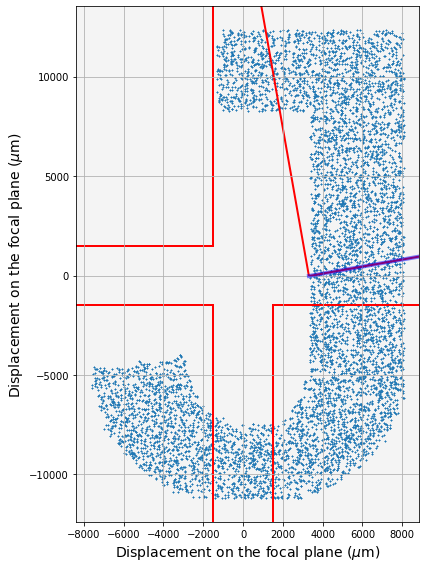

In [9]:
jasmine.detectors[2].position_angle = Angle(10.0, unit='degree')

fig,ax = plt.subplots(figsize=(8,8))
jasmine.display_focal_plane(ax, src)
fig.tight_layout()
plt.show()

The locations on the detector are re-calculated by `observe`.

In [10]:
pos = jasmine.observe(table)

This time, the detector is not aligned to the focal plane axis. The "J"-shape is rotated in the detector coordinate.

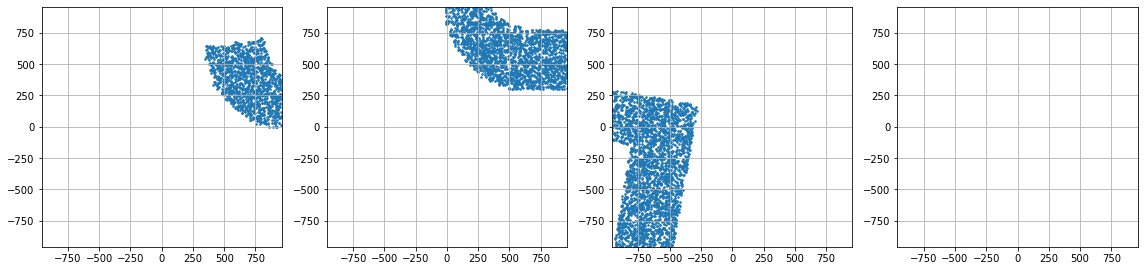

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))
for n, ax in enumerate(axes.flat):
    ax.set_aspect(1.0)
    ax.scatter(pos[n]['nx'],pos[n]['ny'],10,marker='.')
    ax.set_xlim(jasmine.detectors[n].xrange)
    ax.set_ylim(jasmine.detectors[n].yrange)
    ax.grid()
fig.tight_layout()
plt.show()

One more example is presented. We find that the detector center is shifted by (15 mm, 5 mm) on the focal plane. Use the `offset_dx` and `offset_dy` attributes to shift the detector. Use the `display_focal_plane` function to see where is the detector. This time, the "J"-shape is not entirely captured by the field-of-view.

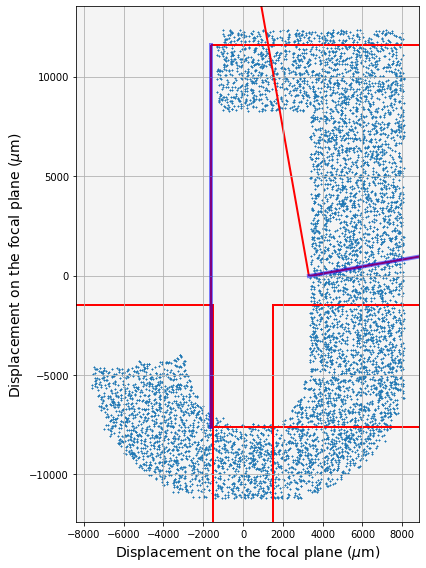

In [12]:
jasmine.detectors[3].offset_dx = 8000*u.um
jasmine.detectors[3].offset_dy = 2000*u.um

fig,ax = plt.subplots(figsize=(8,8))
jasmine.display_focal_plane(ax, src)
fig.tight_layout()
plt.show()

The locations on the detector are calculated by `observe`.

In [13]:
pos = jasmine.observe(table)

Here is the image obtained by the detector. The "J"-shape is truncated.

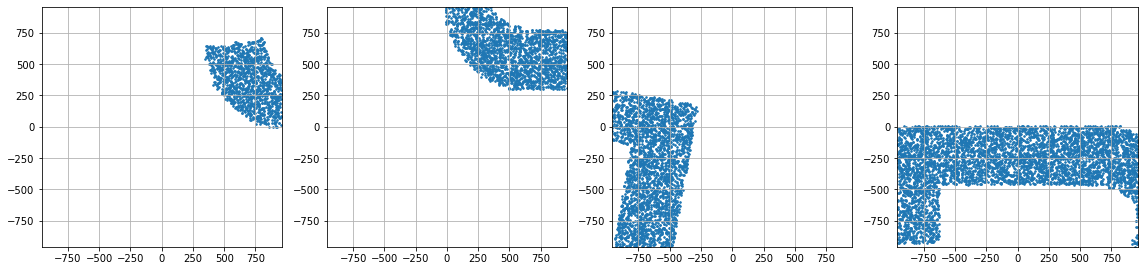

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))
for n, ax in enumerate(axes.flat):
    ax.set_aspect(1.0)
    ax.scatter(pos[n]['nx'],pos[n]['ny'],10,marker='.')
    ax.set_xlim(jasmine.detectors[n].xrange)
    ax.set_ylim(jasmine.detectors[n].yrange)
    ax.grid()
fig.tight_layout()
plt.show()